### Tutorial Problem 1:

The file ['qsar_fish_toxicity.csv'](https://raw.githubusercontent.com/bikirnaroy/IITB_ML_workshop/main/qsar_fish_toxicity.csv) contains molecular descriptor data of 908 chemicals. This dataset was used to develop quantitative regression QSAR models to predict acute aquatic toxicity towards the fish Pimephales promelas (fathead minnow) on a set of 908 chemicals. LC50 data, which is the concentration that causes death in 50% of test fish over a test duration of 96 hours, was used as model response. The model comprised 6 molecular descriptors: MLOGP (molecular properties), CIC0 (information indices), GATS1i (2D autocorrelations), NdssC (atom-type counts), NdsCH ((atom-type counts), SM1_Dz(Z) (2D matrix-based descriptors).

* **Analyzing the Data:** Plot the distributions of the six descriptors, see if the range of values vary very widely between the descriptors. Will this be a problem for your model? If yes, how can you remedy it. Calculate the correlations between `LC50` and each of the six descriptors.

* **Test-Train Splitting:** Split the data into a training set containing  80% of the data selected randomly and a test set containing the rest 20% of the data.

* **Model Training and Validation:** Train a linear regression model on the Training Data and validate it using the Testing data. Calculate the **Mean Squared Error (MSE)** and $R^{2}$ for both the training and testing data.

* **Visualization:** Plot the predicted `LC50` values against the true values given in the dataset and check their correlation. Also create a bar plot of the coefficients to visualize how much each of the descriptors is contributing to the final model.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/bikirnaroy/IITB_ML_workshop/main/qsar_fish_toxicity.csv')
df

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390
...,...,...,...,...,...,...,...
903,2.801,0.728,2.226,0,2,0.736,3.109
904,3.652,0.872,0.867,2,3,3.983,4.040
905,3.763,0.916,0.878,0,6,2.918,4.818
906,2.831,1.393,1.077,0,1,0.906,5.317


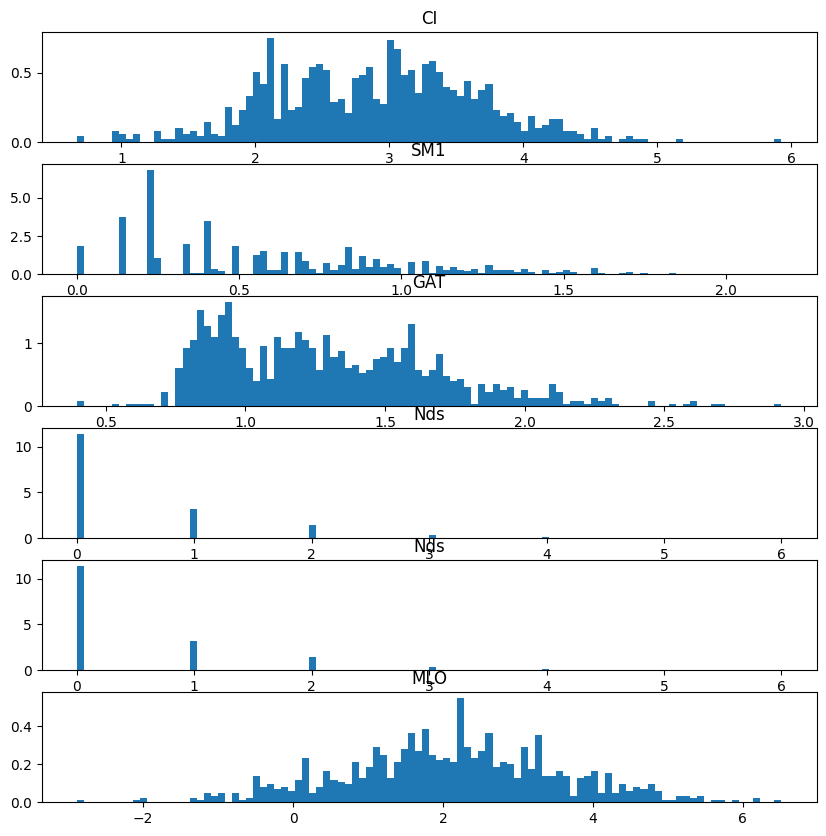

In [ ]:
CI,SM1,GAT,Nds,Nds,MLO,LC50=df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],df.iloc[:,3],df.iloc[:,4],df.iloc[:,5],df.iloc[:,6]

fig, ax = plt.subplots(6,figsize=(10, 10))

ax[0].hist(CI,bins=100,density=True)
ax[0].set_title('CI')

ax[1].hist(SM1,bins=100,density=True)
ax[1].set_title('SM1')

ax[2].hist(GAT,bins=100,density=True)
ax[2].set_title('GAT')

ax[3].hist(Nds,bins=100,density=True)
ax[3].set_title('Nds')

ax[4].hist(Nds,bins=100,density=True)
ax[4].set_title('Nds')

ax[5].hist(MLO,bins=100,density=True)
ax[5].set_title('MLO')

# ax[6].hist(LC50,bins=100,density=True)
# ax[6].set_title('LC50')

plt.show()

In [ ]:
descriptors = ['MLOGP', 'CIC0', 'GATS1i', 'NdssC', 'NdsCH', 'SM1_Dz(Z)']

df[descriptors].describe()

,MLOGP,CIC0,GATS1i,NdssC,NdsCH,SM1_Dz(Z)
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2.109285,2.898129,1.293591,0.485683,0.229075,0.628468
std,1.433181,0.756088,0.394303,0.861279,0.605335,0.428459
min,-2.884000,0.667000,0.396000,0.000000,0.000000,0.000000
25%,1.209000,2.347000,0.950750,0.000000,0.000000,0.223000
50%,2.127000,2.934000,1.240500,0.000000,0.000000,0.570000
75%,3.105000,3.407000,1.562250,1.000000,0.000000,0.892750
max,6.515000,5.926000,2.920000,6.000000,4.000000,2.171000


In [ ]:
correlation_matrix = df.corr()
descriptor = 'LC50'
correlation_with_descriptor = correlation_matrix[descriptor]
# sorted_correlation_with_descriptor = correlation_with_descriptor.abs().sort_values(ascending=False)
print(correlation_with_descriptor)

CIC0         0.291854
SM1_Dz(Z)    0.410893
GATS1i      -0.397965
NdsCH        0.172004
NdssC        0.172390
MLOGP        0.651664
LC50         1.000000
Name: LC50, dtype: float64


In [ ]:
x_data=df.drop(columns=['LC50']).values
y_data=df['LC50'].values

# print(x_data.shape)
# print(y_data.shape)

dummy_ones=np.ones(np.shape(y_data)[0])
x_data=np.c_[dummy_ones,x_data]
# x_data.shape

A=np.linalg.inv(np.matmul(x_data.T,x_data))
B=np.matmul(x_data.T,y_data)
params=np.matmul(A,B)

params



(908, 6)
(908,)


array([ 2.17456016,  0.38562621,  1.25562193, -0.74641356,  0.41355009,
        0.06433409,  0.39005251])

In [ ]:
# def fit_leastsq(x,y):
#     xav = np.average(x)
#     yav = np.average(y)
#     xyav = np.average(x*y)
#     x2av = np.average(x*x)

#     theta1_hat = (xyav - xav*yav)/(x2av - xav*xav)
#     theta0_hat = (x2av*yav - xav*xyav)/(x2av - xav*xav)
#     return(theta0_hat,theta1_hat)

In [ ]:
def r_squared(y,y_hat):
    yav = np.average(y)
    ssr = np.sum((y-y_hat)*(y-y_hat))
    tsr = np.sum((y-yav)*(y-yav))
    r2 = 1 - (ssr/tsr)
    return(r2)

In [ ]:
y_fit=np.matmul(x_data,params)
rsq=r_squared(y_data,y_fit)
print(rsq)

0.5771635677620812


In [ ]:
#sci-kit learn linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[descriptors]
y = df['LC50']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.0539552119925362
R-squared: 0.5643869899331235


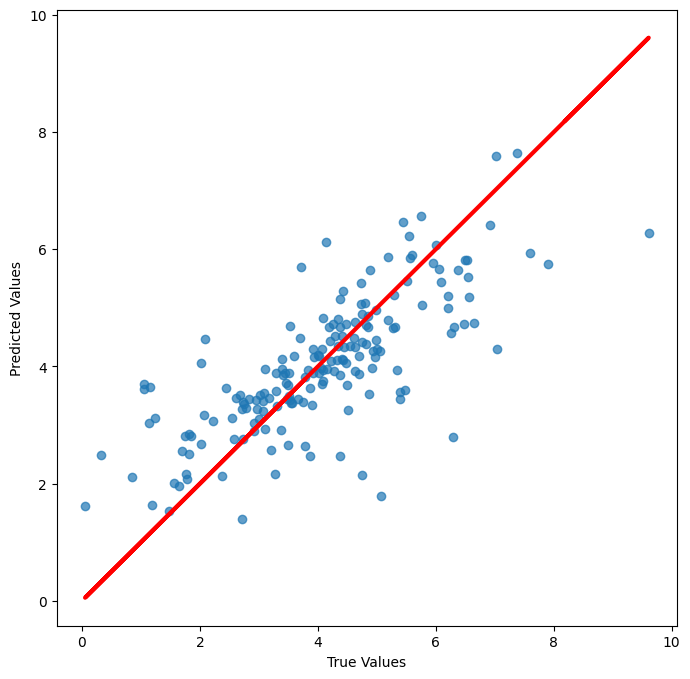

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.plot(y_data,y_data,'r-', lw=3)
plt.show()

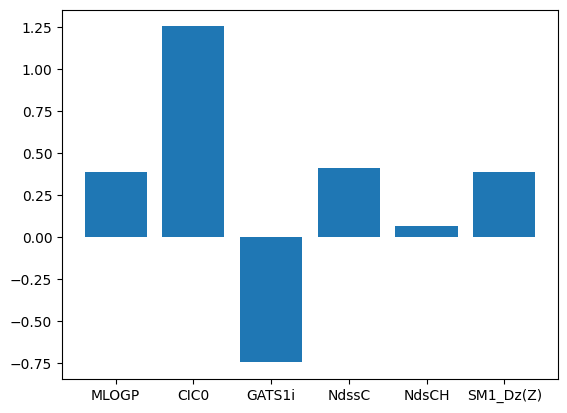

In [ ]:
plt.bar(descriptors,params[1:])
plt.show()

### Tutorial Problem 2:

The file [curated-solubility-dataset.csv](https://raw.githubusercontent.com/bikirnaroy/IITB_ML_workshop/main/curated-solubility-dataset.csv) contains molecular descriptor data for 9982 molecules, along with their SMILES strings. The `solubility` data of these molecules is also included. Train a linear regression model to predict the `solubility` of molecules using this dataset.

* **Filtering out Data:** Once you have loaded the dataset, analyze the data by checking their distribution and correlations with the solubility. Filter out columns that are not relevant for creating a model.

* **Test-Train Splitting:** Split the data into a training set containing  80% of the data selected randomly and a test set containing the rest 20% of the data.

* **Model Training and Validation:** Choose all or a subset of the descriptors to create a linear regression model. Train the model on the Training Data and validate it on the Testing Data. Calculate the $R^{2}$ to check the goodness of the fit.

* **Visualization:** Plot the predicted `Solubility` values against the true values given in the dataset and check their correlation. Also create a bar plot of the coefficients to visualize how much each of the descriptors is contributing to the final model.

* **Bonus:** You can generate additional molecular descriptors from the SMILE strings using the python package `rdkit` and add them to the dataset. Check if these descriptors boost the performance of your model.


In [ ]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 28.4 MB/s eta 0:00:00


In [ ]:
sol_df=pd.read_csv('https://raw.githubusercontent.com/bikirnaroy/IITB_ML_workshop/main/curated-solubility-dataset.csv')
sol_df

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.000000,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.000000,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.000000,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.000000,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.000000,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,I-84,tetracaine,InChI=1S/C15H24N2O2/c1-4-5-10-16-14-8-6-13(7-9...,GKCBAIGFKIBETG-UHFFFAOYSA-N,C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C,-3.010000,0.000000,1,G1,264.369,...,8.0,106.0,1.0,0.0,0.0,1.0,41.57,115.300645,2.394548e+00,374.236893
9978,I-85,tetracycline,InChI=1S/C22H24N2O8/c1-21(31)8-5-4-6-11(25)12(...,OFVLGDICTFRJMM-WESIUVDSSA-N,OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...,-2.930000,0.000000,1,G1,444.440,...,2.0,170.0,1.0,0.0,3.0,4.0,181.62,182.429237,2.047922e+00,1148.584975
9979,I-86,thymol,InChI=1S/C10H14O/c1-7(2)9-5-4-8(3)6-10(9)11/h4...,MGSRCZKZVOBKFT-UHFFFAOYSA-N,c1(cc(ccc1C(C)C)C)O,-2.190000,0.019222,3,G5,150.221,...,1.0,60.0,1.0,0.0,0.0,1.0,20.23,67.685405,3.092720e+00,251.049732
9980,I-93,verapamil,"InChI=1S/C27H38N2O4/c1-20(2)27(19-28,22-10-12-...",SGTNSNPWRIOYBX-UHFFFAOYSA-N,COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...,-3.980000,0.000000,1,G1,454.611,...,13.0,180.0,2.0,0.0,0.0,2.0,63.95,198.569223,2.023333e+00,938.203977


In [ ]:
cols=df_sol.columns
print(cols)

Index(['Solubility', 'SD', 'Ocurrences', 'MolWt', 'MolLogP', 'MolMR',
       'HeavyAtomCount', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms',
       'NumRotatableBonds', 'NumValenceElectrons', 'NumAromaticRings',
       'NumSaturatedRings', 'NumAliphaticRings', 'RingCount', 'TPSA',
       'LabuteASA', 'BalabanJ', 'BertzCT'],
      dtype='object')


In [ ]:
df_sol=sol_df.drop(columns=['ID','Group','Name','InChI','InChIKey','SMILES'])

df_sol

,Solubility,SD,Ocurrences,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,-3.616127,0.000000,1,392.510,3.95810,102.4454,23.0,0.0,0.0,2.0,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,-3.254767,0.000000,1,169.183,2.40550,51.9012,13.0,1.0,1.0,2.0,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,-2.177078,0.000000,1,140.569,2.15250,36.8395,9.0,1.0,0.0,2.0,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,-3.924409,0.000000,1,756.226,8.11610,200.7106,53.0,6.0,2.0,7.0,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,-4.662065,0.000000,1,422.525,2.48540,119.0760,31.0,6.0,0.0,6.0,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,-3.010000,0.000000,1,264.369,2.61700,78.6762,19.0,4.0,1.0,4.0,8.0,106.0,1.0,0.0,0.0,1.0,41.57,115.300645,2.394548e+00,374.236893
9978,-2.930000,0.000000,1,444.440,-0.21440,109.5409,32.0,9.0,6.0,10.0,2.0,170.0,1.0,0.0,3.0,4.0,181.62,182.429237,2.047922e+00,1148.584975
9979,-2.190000,0.019222,3,150.221,2.82402,46.9328,11.0,1.0,1.0,1.0,1.0,60.0,1.0,0.0,0.0,1.0,20.23,67.685405,3.092720e+00,251.049732
9980,-3.980000,0.000000,1,454.611,5.09308,131.6560,33.0,6.0,0.0,6.0,13.0,180.0,2.0,0.0,0.0,2.0,63.95,198.569223,2.023333e+00,938.203977


In [ ]:
descriptors = ['SD', 'Ocurrences', 'MolWt', 'MolLogP', 'MolMR',
       'HeavyAtomCount', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms',
       'NumRotatableBonds', 'NumValenceElectrons', 'NumAromaticRings',
       'NumSaturatedRings', 'NumAliphaticRings', 'RingCount', 'TPSA',
       'LabuteASA', 'BalabanJ', 'BertzCT']
correlation_matrix = df_sol.corr()
descriptor = 'Solubility'
correlation_with_descriptor = correlation_matrix[descriptor]
# sorted_correlation_with_descriptor = correlation_with_descriptor.abs().sort_values(ascending=False)
print(correlation_with_descriptor)

Solubility             1.000000
SD                    -0.099553
Ocurrences            -0.021133
MolWt                 -0.368032
MolLogP               -0.608580
MolMR                 -0.424452
HeavyAtomCount        -0.352748
NumHAcceptors          0.040020
NumHDonors             0.193066
NumHeteroatoms        -0.040432
NumRotatableBonds     -0.222040
NumValenceElectrons   -0.346369
NumAromaticRings      -0.343257
NumSaturatedRings     -0.037794
NumAliphaticRings     -0.087706
RingCount             -0.329599
TPSA                   0.111662
LabuteASA             -0.349497
BalabanJ               0.037329
BertzCT               -0.289403
Name: Solubility, dtype: float64


In [ ]:
x_data=df_sol.drop(columns=['Solubility']).values
y_data=df_sol['Solubility'].values

# print(x_data.shape)
# print(y_data.shape)

# dummy_ones=np.ones(np.shape(y_data)[0])
# x_data=np.c_[dummy_ones,x_data]
# # x_data.shape

# A=np.linalg.inv(np.matmul(x_data.T,x_data))
# B=np.matmul(x_data.T,y_data)
# params=np.matmul(A,B)

# params

# def r_squared(y,y_hat):
#     yav = np.average(y)
#     ssr = np.sum((y-y_hat)*(y-y_hat))
#     tsr = np.sum((y-yav)*(y-yav))
#     r2 = 1 - (ssr/tsr)
#     return(r2)

# y_fit=np.matmul(x_data,params)
# rsq=r_squared(y_data,y_fit)
# print(rsq)

#sci-kit learn linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_sol[descriptors]
y = df_sol['Solubility']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


-2.149034892428159
Mean Squared Error: 2.711056308464946
R-squared: 0.5002334416844779


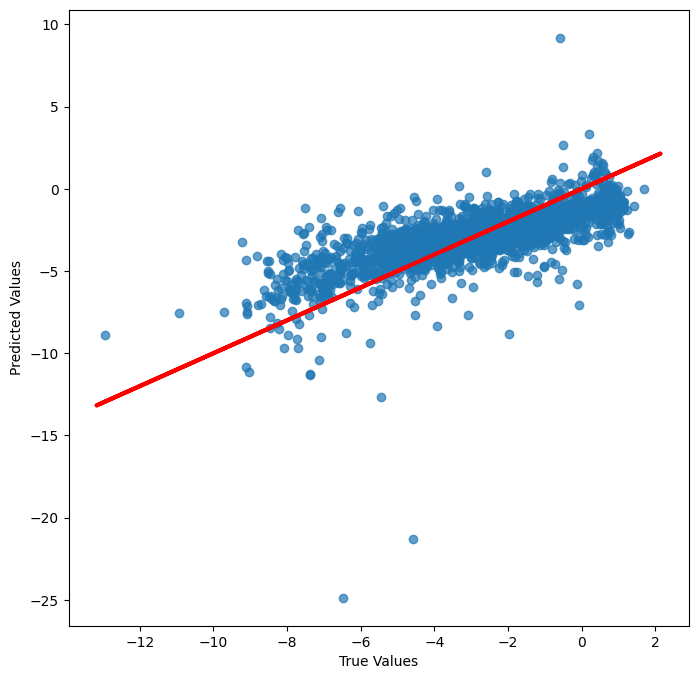

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.plot(y_data,y_data,'r-', lw=3)
plt.show()

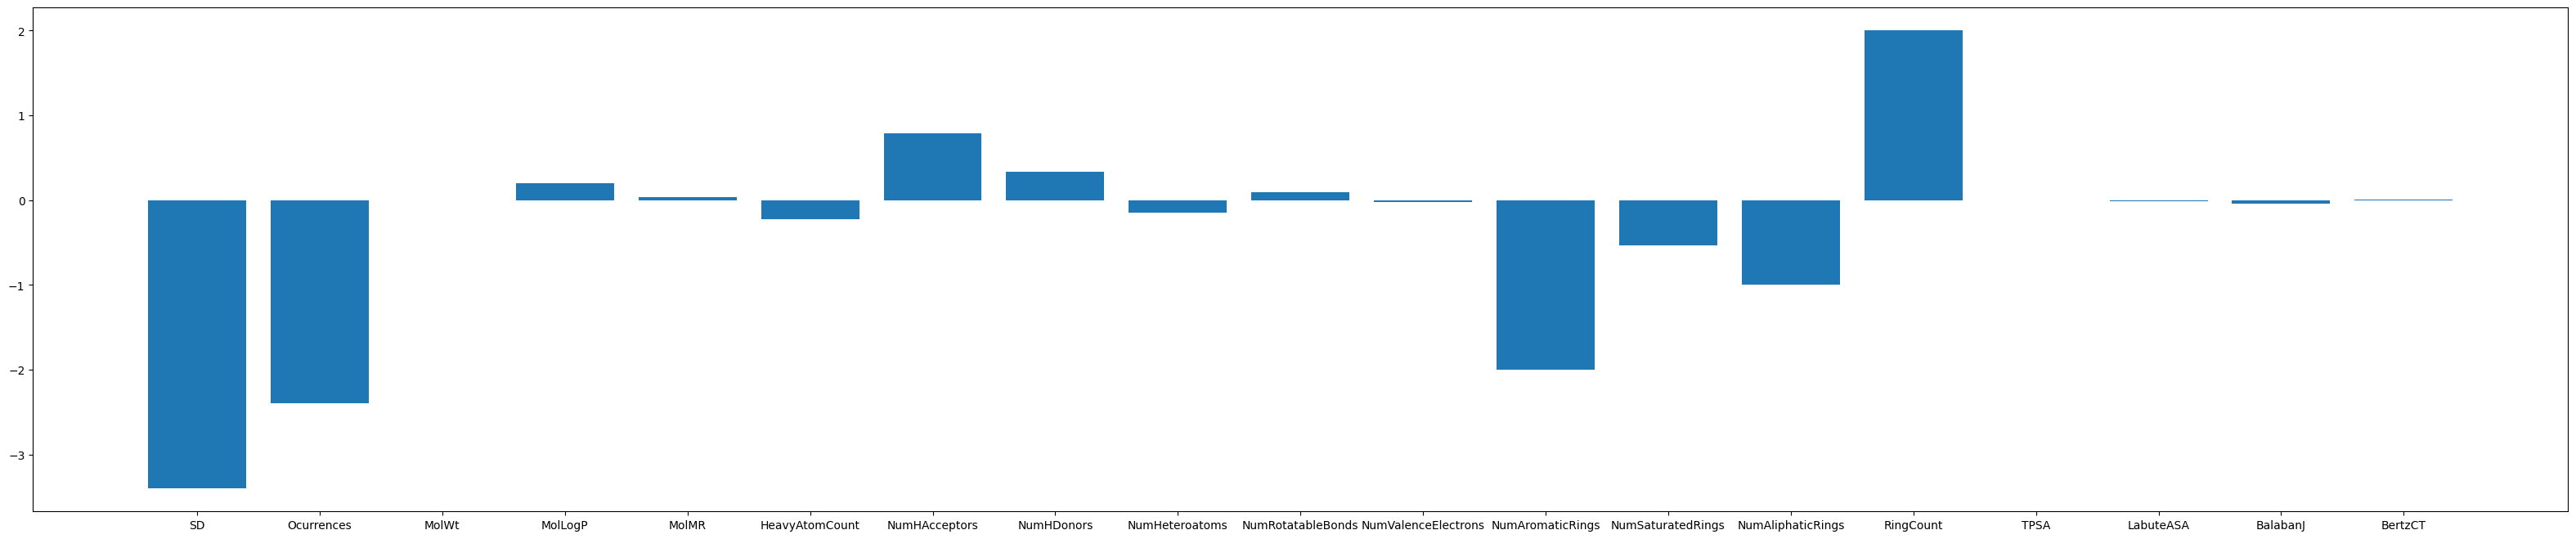

In [ ]:
plt.figure(figsize=(40, 8))
plt.bar(descriptors,params[1:])
plt.show()

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors

df_sol=sol_df.drop(columns=['ID','Group','Name','InChI','InChIKey'])


# Example function to compute a descriptor (you can add more)
def compute_descriptor(smiles):
    mol = Chem.MolFromSmiles(smiles)
    descriptor_value = Descriptors.HeavyAtomMolWt(mol)  # Example: LogP
    return descriptor_value

# Apply the function to your SMILES column
df_sol["HeavyAtomWeight"] = df_sol["SMILES"].apply(compute_descriptor)

df_sol.info()

descriptors = ['SD', 'Ocurrences', 'MolWt', 'MolLogP', 'MolMR',
       'HeavyAtomCount', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms',
       'NumRotatableBonds', 'NumValenceElectrons', 'NumAromaticRings',
       'NumSaturatedRings', 'NumAliphaticRings', 'RingCount', 'TPSA',
       'LabuteASA', 'BalabanJ', 'BertzCT', 'HeavyAtomWeight']

x_data=df_sol.drop(columns=['Solubility','SMILES']).values
y_data=df_sol['Solubility'].values



print(x_data.shape)
print(y_data.shape)

dummy_ones=np.ones(np.shape(y_data)[0])
x_data=np.c_[dummy_ones,x_data]
# x_data.shape

A=np.linalg.inv(np.matmul(x_data.T,x_data))
B=np.matmul(x_data.T,y_data)
params=np.matmul(A,B)

params

def r_squared(y,y_hat):
    yav = np.average(y)
    ssr = np.sum((y-y_hat)*(y-y_hat))
    tsr = np.sum((y-yav)*(y-yav))
    r2 = 1 - (ssr/tsr)
    return(r2)

y_fit=np.matmul(x_data,params)
rsq=r_squared(y_data,y_fit)
print(rsq)

#sci-kit learn linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_sol[descriptors]
y = df_sol['Solubility']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


[18:06:09] WARNING: not removing hydrogen atom without neighbors
[18:06:09] WARNING: not removing hydrogen atom without neighbors
[18:06:09] WARNING: not removing hydrogen atom without neighbors
[18:06:09] WARNING: not removing hydrogen atom without neighbors
[18:06:09] WARNING: not removing hydrogen atom without neighbors
[18:06:09] WARNING: not removing hydrogen atom without neighbors
[18:06:09] WARNING: not removing hydrogen atom without neighbors
[18:06:09] WARNING: not removing hydrogen atom without neighbors
[18:06:09] WARNING: not removing hydrogen atom without neighbors
[18:06:09] WARNING: not removing hydrogen atom without neighbors
[18:06:09] WARNING: not removing hydrogen atom without neighbors
[18:06:09] WARNING: not removing hydrogen atom without neighbors
[18:06:10] WARNING: not removing hydrogen atom without neighbors
[18:06:10] WARNING: not removing hydrogen atom without neighbors
[18:06:10] WARNING: not removing hydrogen atom without neighbors
[18:06:10] WARNING: not r

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SMILES               9982 non-null   object 
 1   Solubility           9982 non-null   float64
 2   SD                   9982 non-null   float64
 3   Ocurrences           9982 non-null   int64  
 4   MolWt                9982 non-null   float64
 5   MolLogP              9982 non-null   float64
 6   MolMR                9982 non-null   float64
 7   HeavyAtomCount       9982 non-null   float64
 8   NumHAcceptors        9982 non-null   float64
 9   NumHDonors           9982 non-null   float64
 10  NumHeteroatoms       9982 non-null   float64
 11  NumRotatableBonds    9982 non-null   float64
 12  NumValenceElectrons  9982 non-null   float64
 13  NumAromaticRings     9982 non-null   float64
 14  NumSaturatedRings    9982 non-null   float64
 15  NumAliphaticRings    9982 non-null   f

### Tutorial Problem 3:

The file ['tutorial1_dataset_train.csv'](https://raw.githubusercontent.com/bikirnaroy/IITB_ML_workshop/main/tutorial1_dataset_train.csv) contains 5000 molecules from the [QM9 dataset](). The SMILES column contains a string identifier for the molecule, while the columns `P1`,`P2`,`P3` and `P4` contain data about four properties of these molecules. For each of the four properties `P1-P4`, train a **neural network** using the properties of the molecules whose SMILEs are provided.

* **Test-Train Splitting:** Load the dataset and split it into a training set containing  80% of the data selected randomly and a test set containing the rest 20% of the data.
* **Featurization**: Use the python package `rdkit` to extract molecular descriptors (such as number of aromatic rings, molecular weights etc) from the provided SMILE strings for each of the 5000 molecules. Choose a relevant set of molecular properties to use as features (or predictors) for your regression models.

* **Creating the Model:** Use the python package `pyTorch` to create a nerual network to predict the properites from the features.

* **Model Training and Validation**: Train your model on the Training data and validate it using the Test Data. Calculate $R^{2}$ to measure the accuracy of your model.


In [ ]:
import pandas as pd
mol_df=pd.read_csv('https://raw.githubusercontent.com/bikirnaroy/IITB_ML_workshop/main/tutorial1_dataset_train.csv')
mol_df

,SMILES,P1,P2,P3,P4
0,CC1=CCCCO1,0.9344,0.39370,-2.733458,6.5316
1,CC(=NN)N1CC1,1.1205,0.36672,-2.379820,6.0081
2,NN1C=CCC1=O,4.6177,0.35704,-2.109228,5.4297
3,OC(=O)C(=O)C=C,1.0933,0.31060,-1.917474,3.1556
4,Nc1nc(F)co1,3.3212,0.36979,-1.686293,6.2206
...,...,...,...,...,...
4995,NCC=CCCF,0.7237,0.40196,-2.581664,6.4232
4996,CN(C=N)C(N)=N,2.6597,0.38066,-2.249920,5.8271
4997,C1CC=NN=CN1,5.4005,0.34179,-2.190331,4.5138
4998,CN1CCCN=C1,3.2844,0.36944,-2.642709,5.8502
